## CIFAR-100

    CIFAR-100 (Canadian Institute for Advanced Research 100) is a widely used benchmark dataset in the field of computer vision and machine learning. 
    It was created by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton. 
    
    CIFAR-100 is an extension of the CIFAR-10 dataset, with the main difference being that CIFAR-100 contains 100 classes instead of 10, with each class having 600 images.
    
    CIFAR-100 consists of 100 classes, each representing a specific object or concept. 
    Examples of classes include 'apple', 'clock', 'bee', 'castle', 'dolphin', 'rose', etc.
    
    Each image in CIFAR-100 has a resolution of 32x32 pixels, making them relatively small compared to many other datasets. 
    The images are in RGB format, meaning they have three color channels: red, green, and blue.
    
    There are a total of 60,000 images in the CIFAR-100 dataset. 
    These images are divided into two sets: a training set and a test set. 
    The training set contains 50,000 images, while the test set contains 10,000 images.
    
    Each of the 100 classes in CIFAR-100 has exactly 600 images.

CA2 Rubric: CIFAR-100 dataset Image Classification using CNNs

    Importing relevant packages (2 Marks)
    Loading the CIFAR 100 dataset, train-test split and correct pre-processing (5 Marks)
    One Hot encoding target classes	(2 Marks)
    Proper Neural Network architecture (full marks would be awarded here only when resultant val accuracy exceeds 70%) (12 Marks)
    Print model summary	(1 Mark)
    Epoch vs Train/Validation accuracy plot	(3 Marks)
    Validation accuracy > 35% (2 Marks)
    Validation accuracy > 70% (3 Marks)

Network Architecure guidelines

    1) At least 3 CNN layers (first one of them being the input one as well)
    2) At least 2 Maximum Pooling layers
    3) 1 Flatten layer
    4) At least 1 hidden dense layer
    5) Output dense layer (no of neurons here would be equal to no of classes)

    Use 'relu' as an activation function in CNN and hidden dense layers
    Use 'softmax' as an activation function in output dense layer
    Use 'categorical_crossentropy' as loss in model compilation
    Use 'rmsprop' or 'adam' as optimizer in model compilation
    At least 7 epochs should be there

Apart from above mentioned bare minimum, use layers like BatchNormalization, DropOut etc. to enhance your model.

In [2]:
#Import necessary packages
import matplotlib.pyplot as plt
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, BatchNormalization
from keras.utils import to_categorical
import warnings
warnings.filterwarnings("ignore")

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
(x_train, y_train), (x_test, y_test) =cifar100.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

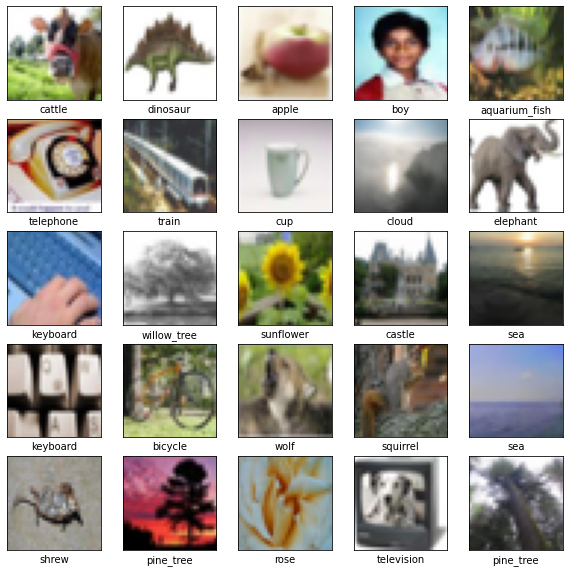

In [4]:
class_names = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    label_index = y_train[i][0]
    if label_index >= 0 and label_index < len(class_names):
        plt.xlabel(class_names[label_index])
plt.show()

In [5]:
#number of classes 
num_classes = 100 

In [6]:
# One-hot encoding target classes
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [7]:
print("Shape after one-hot encoding: ", y_train.shape)

Shape after one-hot encoding:  (50000, 100)


In [8]:
from keras.layers import MaxPooling2D
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D

In [9]:
model = Sequential()

# layers
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((3, 3)))

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 4, 4, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1, 1, 256)           │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 1, 1, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 1, 256)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 74,624 (291.50 KB)

 Trainable params: 73,792 (288.25 KB)

 Non-trainable params: 832 (3.25 KB)

In [18]:
model.add(Flatten())

In [19]:
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

In [20]:
# Output layer with softmax activation
model.add(Dense(num_classes, activation='softmax'))

In [21]:
import tensorflow as tf

In [22]:
#compiling the model 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 4, 4, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1, 1, 256)           │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 1, 1, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          25,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │          51,7

 Total params: 272,200 (1.04 MB)

 Trainable params: 269,832 (1.03 MB)

 Non-trainable params: 2,368 (9.25 KB)

In [ ]:
history = model.fit(x_train, y_train, epochs=20, batch_size=256, validation_data=(x_test, y_test), verbose=1)

Epoch 1/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 56s 218ms/step - accuracy: 0.0159 - loss: 4.6125 - val_accuracy: 0.0214 - val_loss: 4.5603
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 40s 203ms/step - accuracy: 0.0347 - loss: 4.3510 - val_accuracy: 0.0275 - val_loss: 4.4400
Epoch 3/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 42s 214ms/step - accuracy: 0.0444 - loss: 4.2042 - val_accuracy: 0.0580 - val_loss: 4.1656
Epoch 4/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 42s 212ms/step - accuracy: 0.0543 - loss: 4.0907 - val_accuracy: 0.0804 - val_loss: 3.9094
Epoch 5/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 210ms/step - accuracy: 0.0688 - loss: 3.9688 - val_accuracy: 0.0905 - val_loss: 3.8690
Epoch 6/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 42s 212ms/step - accuracy: 0.0732 - loss: 3.8912 - val_accuracy: 0.0780 - val_loss: 4.0263
Epoch 7/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 42s 212ms/step - accuracy: 0.0820 - loss: 3.7944 - val_accuracy: 0.1134 - val_loss: 3.6501
Epoch 8/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 208ms/step - accuracy: 0.0955 - loss: 3

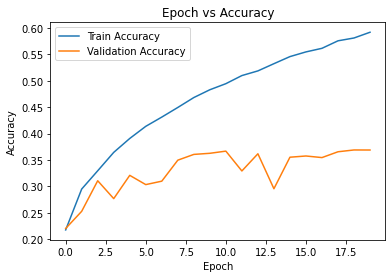

In [50]:
#epoch vs train/validation accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch vs Accuracy')
plt.legend()
plt.show()

In [51]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.3741 - loss: 2.7561
Test Loss: 2.7757203578948975
Test Accuracy: 0.36890000104904175


In [52]:
if history.history['val_accuracy'][-1] > 0.35:
    print("Validation accuracy exceeds 35%")
else:
    print("Validation accuracy does not exceed 35%")

Validation accuracy exceeds 35%


In [53]:
if history.history['val_accuracy'][-1] > 0.70:
    print("Validation accuracy exceeds 70%")
else:
    print("Validation accuracy does not exceed 70%")

Validation accuracy does not exceed 70%
